In [2]:
# to see our plots
# %pylab inline
%matplotlib inline
import bt
import numpy as np

In [3]:
# fetch some data
data = bt.get('spy,agg', start='2010-01-10')
print data.head(10)
print data.size

                   spy        agg
Date                             
2010-01-11  100.518888  86.193072
2010-01-12   99.581425  86.742281
2010-01-13  100.422513  86.376144
2010-01-14  100.694113  86.600819
2010-01-15   99.563899  86.767244
2010-01-19  100.808008  86.625782
2010-01-20   99.782932  86.850463
2010-01-21   97.864196  86.875426
2010-01-22   95.682624  86.925353
2010-01-25   96.173257  86.917030
3344


In [5]:
# create the strategy
s = bt.Strategy('s1', [bt.algos.RunMonthly(),
                       bt.algos.SelectAll(),
                       bt.algos.WeighEqually(),
                       bt.algos.Rebalance()])
print type(s)

<class 'bt.core.Strategy'>


In [7]:
# create a backtest and run it
test = bt.Backtest(s, data)
res = bt.run(test)
print type(test)
print type(res)

s1
0%                          100%
[##############################] | ETA: 00:00:00
Total time elapsed: 00:00:00
<function run at 0x7f9bcc9e2398>
<class 'bt.backtest.Backtest'>
<class 'bt.backtest.Result'>


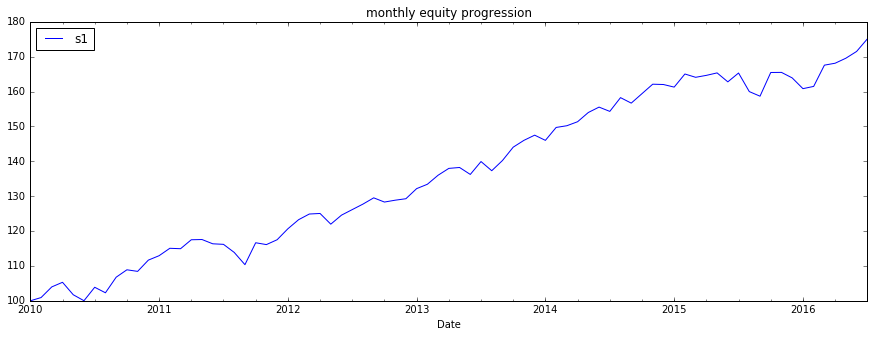

In [6]:
# first let's see an equity curve
# res.plot()
type(res)
res.plot()

In [8]:
res.display()

Stat                 s1
-------------------  ----------
Start                2010-01-11
End                  2016-08-30
Risk-free rate       0.00%

Total Return         75.27%
Daily Sharpe         1.18
CAGR                 8.83%
Max Drawdown         -7.83%

MTD                  0.10%
3m                   3.30%
6m                   8.54%
YTD                  6.93%
1Y                   9.08%
3Y (ann.)            8.48%
5Y (ann.)            9.04%
10Y (ann.)           8.83%
Since Incep. (ann.)  8.83%

Daily Sharpe         1.18
Daily Mean (ann.)    8.74%
Daily Vol (ann.)     7.38%
Daily Skew           -0.35
Daily Kurt           3.64
Best Day             2.48%
Worst Day            -3.11%

Monthly Sharpe       1.40
Monthly Mean (ann.)  8.75%
Monthly Vol (ann.)   6.25%
Monthly Skew         0.00
Monthly Kurt         0.09
Best Month           5.69%
Worst Month          -3.39%

Yearly Sharpe        1.76
Yearly Mean          7.88%
Yearly Vol           4.47%
Yearly Skew          -0.22
Yearly Kurt   

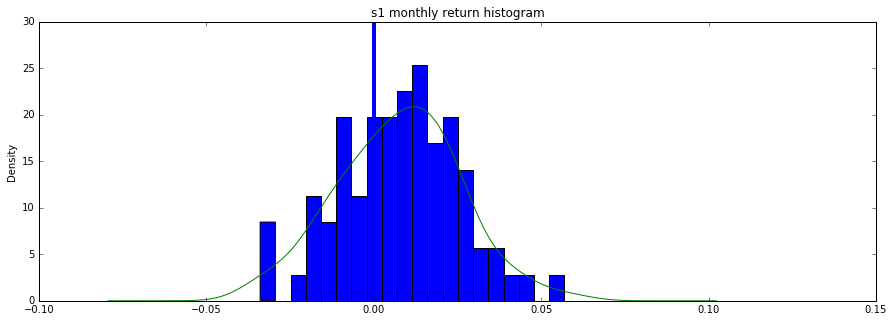

In [9]:
# ok and how does the return distribution look like?
res.plot_histogram()

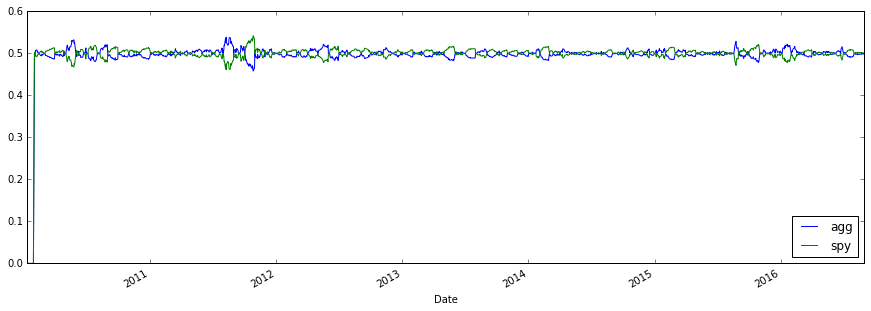

In [10]:
# and just to make sure everything went along as planned, let's plot the security weights over time
res.plot_security_weights()

In [11]:
# create our new strategy
s2 = bt.Strategy('s2', [bt.algos.RunWeekly(),
                        bt.algos.SelectAll(),
                        bt.algos.WeighInvVol(),
                        bt.algos.Rebalance()])

s1
0%                          100%
[##############################] | ETA: 00:00:00
Total time elapsed: 00:00:00
s2
0%                          100%
[##############################] | ETA: 00:00:00
Total time elapsed: 00:00:01


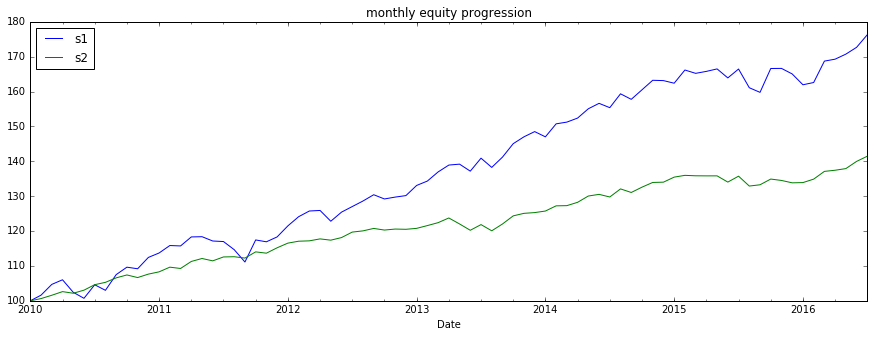

In [12]:
# now let's test it with the same data set. We will also compare it with our first backtest.
test2 = bt.Backtest(s2, data)
res2 = bt.run(test, test2)

res2.plot()

In [14]:
# download data
data = bt.get('aapl,msft,c,gs,ge', start='2010-01-01')

# calculate moving average DataFrame using pandas' rolling_mean
import pandas as pd
# a rolling mean is a moving average, right?
sma = pd.rolling_mean(data, 50)

/home/liuenda/.pyenv/versions/anaconda2-4.1.0/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=50,center=False).mean()


In [15]:
# download data
data = bt.get('aapl,msft,c,gs,ge', start='2010-01-01')

# calculate moving average DataFrame using pandas' rolling_mean
import pandas as pd
# a rolling mean is a moving average, right?
sma = pd.rolling_mean(data, 50)

/home/liuenda/.pyenv/versions/anaconda2-4.1.0/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=50,center=False).mean()


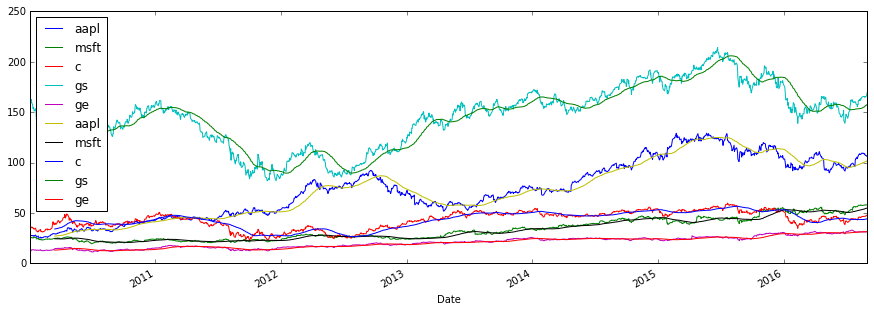

In [16]:
# let's see what the data looks like - this is by no means a pretty chart, but it does the job
plot = bt.merge(data, sma).plot(figsize=(15, 5))

In [3]:
import ffn
import bt
#%pylab inline

In [4]:
# download data
data = bt.get('aapl,msft,c,gs,ge', start='2010-01-01')

# calculate moving average DataFrame using pandas' rolling_mean
import pandas as pd
# a rolling mean is a moving average, right?
sma = pd.rolling_mean(data, 50)

/home/liuenda/.pyenv/versions/anaconda2-4.1.0/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=50,center=False).mean()


In [5]:
type(bt.merge(data,sma))

pandas.core.frame.DataFrame

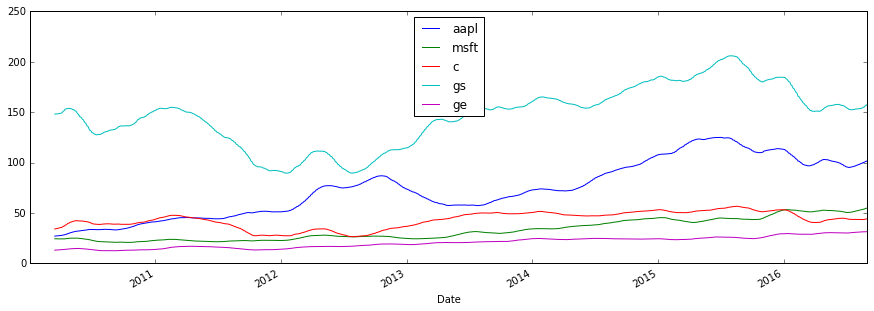

In [11]:
%matplotlib inline
import pandas as pd
pd.DataFrame(sma).plot(figsize=(15, 5))


In [50]:
signal = data > sma
signal.tail(100)

,aapl,msft,c,gs,ge
Date,,,,,
2016-04-12,True,True,True,True,True
2016-04-13,True,True,True,True,True
2016-04-14,True,True,True,True,True
2016-04-15,True,True,True,True,True
2016-04-18,True,True,True,True,True
2016-04-19,True,True,True,True,True
2016-04-20,True,True,True,True,True
2016-04-21,True,True,True,True,True
2016-04-22,True,False,True,True,True


In [24]:
class SelectWhere(bt.Algo):

    """
    Selects securities based on an indicator DataFrame.

    Selects securities where the value is True on the current date (target.now).

    Args:
        * signal (DataFrame): DataFrame containing the signal (boolean DataFrame)

    Sets:
        * selected

    """
    def __init__(self, signal):
        self.signal = signal

    def __call__(self, target):
        # get signal on target.now
        if target.now in self.signal.index:
            sig = self.signal.ix[target.now]

            # get indices where true as list
            selected = list(sig.index[sig])

            # save in temp - this will be used by the weighing algo
            target.temp['selected'] = selected

        # return True because we want to keep on moving down the stack
        return True
# first we create the Strategy
s = bt.Strategy('above50sma', [SelectWhere(data > sma),
                               bt.algos.WeighEqually(),
                               bt.algos.Rebalance()])

# now we create the Backtest
t = bt.Backtest(s, data)

# and let's run it!
res = bt.run(t)

above50sma
0%                          100%
[##############################] | ETA: 00:00:00
Total time elapsed: 00:00:00


In [25]:
signal.index

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2016-08-18', '2016-08-19', '2016-08-22', '2016-08-23',
               '2016-08-24', '2016-08-25', '2016-08-26', '2016-08-29',
               '2016-08-30', '2016-08-31'],
              dtype='datetime64[ns]', name=u'Date', length=1678, freq=None)

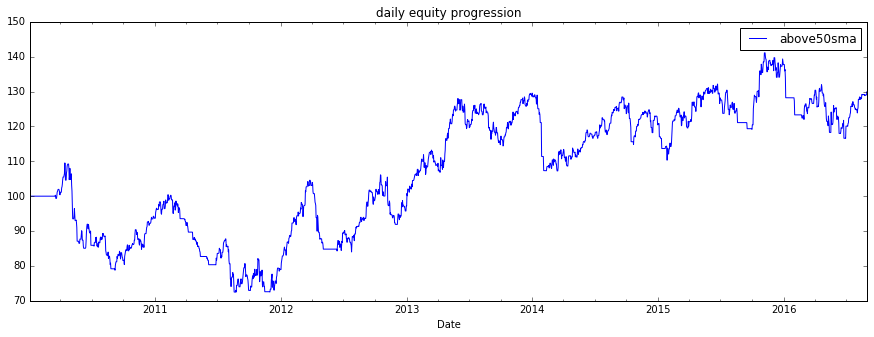

In [26]:
res.plot('d')

In [49]:
sig=signal.ix['2010-05-19']
print sig
list(sig.index[sig])

aapl     True
msft    False
c       False
gs      False
ge      False
Name: 2010-05-19 00:00:00, dtype: bool


['aapl']